# Assignment 12.2 - Term Project

# Syed Abidi - 11/20/2020

# DSC-530 - Data Exploration and Analysis Assignment

##  Term Project  :  Credit Card Fraud

Your dataset

A PowerPoint presentation outlining your statistical question/hypothesis

Using Python, submit your results via your notebook or export your code and submit via the assignment link. You must show your code and work for full credit.
- A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question - remember this is never perfect, so don't be worried if you miss one (Chapter 1). 

- Describe what the 5 variables mean in the dataset (Chapter 1).

- Include a histogram of each of the 5 variables are in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

- Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

- Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isnâ€™t comparing two  variables against each other - it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

- Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).
 
- Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

- Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson's correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).

- Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

- For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).



In [1]:
#impriting needed modules
from __future__ import print_function, division
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smtsa
import matplotlib.pyplot as plt
from io import StringIO
from tabulate import tabulate
import pandas as pd
import numpy as np
import sys
import nsfg
import first
import thinkstats2
import thinkplot
import math
import brfss
import scipy.stats
import density
import hinc2
import hinc
import random
import hypothesis
import scatter
import brfss
import survival


In [2]:
# Reading the dataset of Credit card information "creditcardinfo.csv"
df = pd.read_csv('C:\\Users\\abidisy\\Documents\\Bellevue\\DSC 530\\ThinkStats2\\code\\creditcardinfo.csv')

In [3]:
# Defining how I collected the Credit card data

print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
      
print("{:.2f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0] * 100))
      


Total time spanning: 2.0 days
0.17 % of all transactions are fraud. 


In [4]:
# Categorizing the Class variable into Fraud and Non-fraud to get an idea of fraud transactions

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# Running the info to verify if there is any "missing values" or "null values" in any column of give data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Get the basis information of the Credit Card data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Look the head and tail of the credit card dataset
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


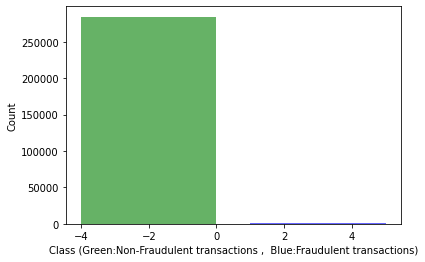

<Figure size 576x432 with 0 Axes>

In [8]:
# Getting the histogram to see transaction types

fraud = df[df.Class==1]
normal = df[df.Class==0]

fraud_hist = thinkstats2.Hist(fraud.Class)
normal_hist = thinkstats2.Hist(normal.Class)

thinkplot.Hist(fraud_hist, align='left', width=4, color='Blue')
thinkplot.Hist(normal_hist, align='right', width=4, color='Green')
thinkplot.Show(xlabel='Class (Green:Non-Fraudulent transactions ,  Blue:Fraudulent transactions)', ylabel='Count')


=======================================================================================================================

####  Question - 1
- A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question - remember this is never perfect, so don't be worried if you miss one (Chapter 1). 

In [9]:
# Answer -1:

# I hvae chosen the following 5 variables 
# 1st Variable 'Class' 
# 2nd Variable 'Time' 
# 3rd Variable 'Amount  
# 4th Variable 'V1  
# 5th Variable 'V2 to V28' 


=======================================================================================================================

####  Question - 2

- Describe what the 5 variables mean in the dataset (Chapter 1).


In [31]:
# Answer -2:
# 1st Variable 'Class' is used to label fraud or normal transaction, 1 means fraud and 0 means normal transactions
# 2nd Variable 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
# 3rd Variable 'Amount' is used in Euro for the amount of each transaction Amount
# 4th Variable 'V1' is used for the first principal components obtained with payment card assurance for the first transactions
# 5th Variable 'V2 to V28' is used for the the principal components obtained with payment card assurance for other transactions



========================================================================================================================

####  Question - 3

- Include a histogram of each of the 5 variables are in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).



C:\Users\abidisy\Documents\Bellevue\DSC 530\ThinkStats2\code\thinkplot.py:182: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return plt.subplot(rows, cols, plot_number, **options)


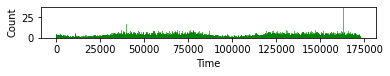

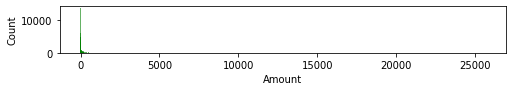

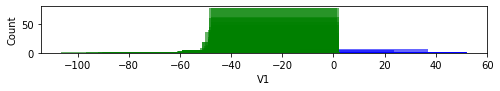

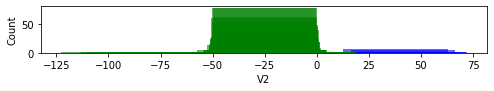

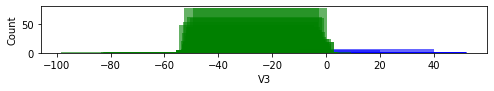

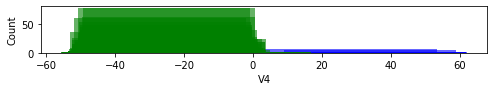

<Figure size 576x432 with 0 Axes>

In [11]:
# Answer -3:

# I will use all historgram plots for "Time", "Fraud Amount", "Fraud Variable-1", "Fraud Variable-2", "Fraud Variable-3" and 
# "Fraud Variable-4"


thinkplot.PrePlot(rows = 6)

thinkplot.SubPlot(1)
fraud_hist1 = thinkstats2.Hist(fraud.Time)
normal_hist1 = thinkstats2.Hist(normal.Time)
thinkplot.Hist(fraud_hist1, align='left', width=50, color='blue')
thinkplot.Hist(normal_hist1, align='right', width=50, color='green')
thinkplot.Show(xlabel='Time', ylabel='Count')

thinkplot.SubPlot(2)
fraud_hist1 = thinkstats2.Hist(fraud.Amount)
normal_hist1 = thinkstats2.Hist(normal.Amount)
thinkplot.Hist(fraud_hist1, align='left', width=50, color='red')
thinkplot.Hist(normal_hist1, align='right', width=50, color='green')
thinkplot.Show(xlabel='Amount', ylabel='Count')

thinkplot.SubPlot(3)
fraud_hist2 = thinkstats2.Hist(fraud.V1)
normal_hist2 = thinkstats2.Hist(normal.V1)
thinkplot.Hist(fraud_hist2, align='left', width=50, color='blue')
thinkplot.Hist(normal_hist2, align='right', width=50, color='green')
thinkplot.Show(xlabel='V1', ylabel='Count')

thinkplot.SubPlot(4)
fraud_hist3 = thinkstats2.Hist(fraud.V2)
normal_hist3 = thinkstats2.Hist(normal.V2)
thinkplot.Hist(fraud_hist3, align='left', width=50, color='blue')
thinkplot.Hist(normal_hist3, align='right', width=50, color='green')
thinkplot.Show(xlabel='V2', ylabel='Count')

thinkplot.SubPlot(5)
fraud_hist4 = thinkstats2.Hist(fraud.V3)
normal_hist4 = thinkstats2.Hist(normal.V3)
thinkplot.Hist(fraud_hist4, align='left', width=50, color='blue')
thinkplot.Hist(normal_hist4, align='right', width=50, color='green')
thinkplot.Show(xlabel='V3', ylabel='Count')

thinkplot.SubPlot(6)
fraud_hist5 = thinkstats2.Hist(fraud.V4)
normal_hist5 = thinkstats2.Hist(normal.V4)
thinkplot.Hist(fraud_hist5, align='left', width=50, color='blue')
thinkplot.Hist(normal_hist5, align='right', width=50, color='green')
thinkplot.Show(xlabel='V4', ylabel='Count')


========================================================================================================================

#### Question - 4
- Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [12]:
# Answer - 4:
# I will find all descriptive characteristics as sown below:

print("Fraud transaction statistics")
print(fraud['Amount'].describe())
print("\nNormal transaction statistics")
print(normal['Amount'].describe())

df[['Time','Amount','Class','V1','V2','V3','V4']].describe()

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


,Time,Amount,Class,V1,V2,V3,V4
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,88.349619,0.001727,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15
std,47488.145955,250.120109,0.041527,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00
25%,54201.500000,5.600000,0.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01
50%,84692.000000,22.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02
75%,139320.500000,77.165000,0.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01
max,172792.000000,25691.160000,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01


In [13]:
# Analysis and oberservations:

# 1) The fraudulent mean of transactions is "122.21" and valid transactions mean is "88.29"

# 2) We found that 50% of the fraudulent transactions were less than 10 and about 50% of the valid transactions were less than 22.

# 3) We found that 75% of the fraudulent transactions are less than 106 and 75% of the valid transactions are less than 77.

# 4) The maximum amount of the fraudulent transaction is 2125.87 and maximum amount of valid transaction was 25691.16

========================================================================================================================

#### Question - 5
- Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isnâ€™t comparing two  variables against each other - it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

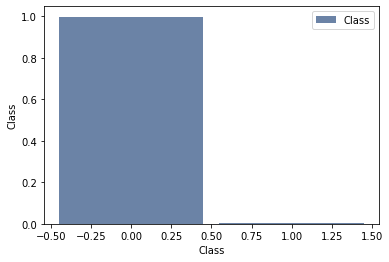

In [17]:
# Answer -5 :
# We will compare two classes of Fraud and normal transactions
pmf = thinkstats2.Pmf(df.Class, label = "Class")
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Class', ylabel='Class')

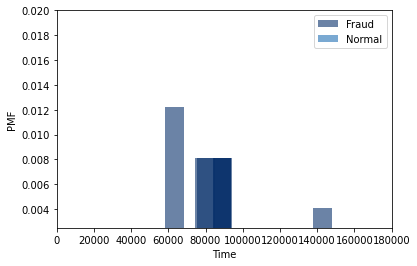

In [14]:

fraud_pmf = thinkstats2.Pmf(fraud.Time, label='Fraud')
normal_pmf = thinkstats2.Pmf(normal.Time, label='Normal')

width=10000
axis = [0, 180000, 0.0025, 0.02]
thinkplot.Hist(fraud_pmf, align='right', width=width)
thinkplot.Hist(normal_pmf, align='left', width=width)
thinkplot.Config(xlabel='Time', ylabel='PMF', axis=axis)

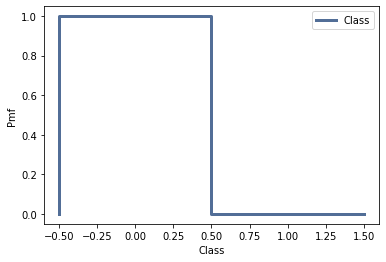

In [18]:
pmf = thinkstats2.Pmf(df.Class, label = "Class")
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Class', ylabel='Pmf')

========================================================================================================================

#### Question - 6
- Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

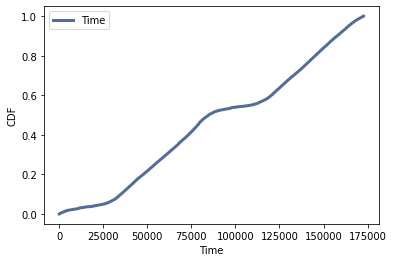

<Figure size 576x432 with 0 Axes>

In [19]:
# I will create the CDF with one variable of time.

cdf = thinkstats2.Cdf(df.Time, label='Time')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Time', ylabel='CDF')

========================================================================================================================

#### Question - 7
- Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [20]:
# Answer - 7: 
# I will plot one analytical distribution of "Amount"    
amounts = df.Amount.dropna()

n, mean, std 284807 71.44127888187855 129.51284817810276


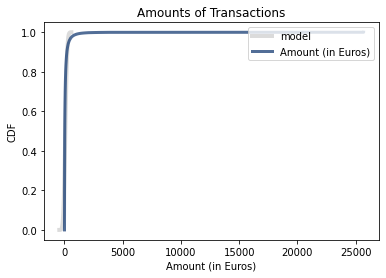

In [21]:


def StandardModel (amounts): 

    cdf = thinkstats2.Cdf(amounts, label='Amount (in Euros)')

    mean, var = thinkstats2.TrimmedMeanVar(amounts)

    std = np.sqrt(var)

    print('n, mean, std', len(amounts), mean, std)
    
    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

  
StandardModel(amounts)
thinkplot.Config(title='Amounts of Transactions', xlabel='Amount (in Euros)',
                ylabel='CDF', loc='upper right')

========================================================================================================================

#### Question - 8
- Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson's correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).
   ]


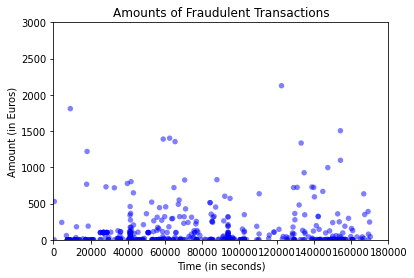

In [22]:
# Answer - 8

# I will create the two scatter plots of Fraudulent and Non-Fraudulent transactions

thinkplot.Scatter(fraud.Time, fraud.Amount, alpha=0.5)
thinkplot.Config(xlabel='Time (in seconds)',
    ylabel='Amount (in Euros)',
    axis=[0, 180000, 0, 3000],
    title = 'Amounts of Fraudulent Transactions',
    legend=False)

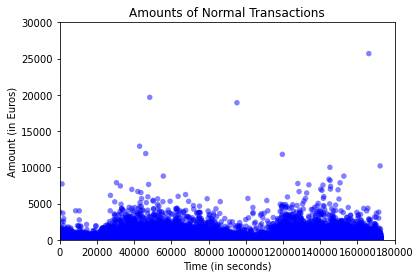

In [23]:
thinkplot.Scatter(normal.Time, normal.Amount, alpha=0.5)
thinkplot.Config(xlabel='Time (in seconds)',
                 ylabel='Amount (in Euros)',
                 axis=[0, 180000, 0, 30000],
                 title = 'Amounts of Normal Transactions',
                 legend=False)


In [24]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
    
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
        
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)


In [25]:
print("Analysis and oberservations:")

print('\nCovariance between Time and Amount for Non-Fraudulent transactions is:{:.4f}'.format(Cov(normal.Time, normal.Amount)))
print('\nCovariance between Time and Amount for Fraudulent transactions is:{:.4f}'.format(Cov(fraud.Time, fraud.Amount)))
print('\nPearson Correlation between Time and Amount for Non-Fraudulent transactions is:{:.4f}'.format(Corr(normal.Time, normal.Amount)))
print('\nPearson Correlation between Time and Amount for Fraudulent transactions is:{:.4f}'.format(Corr(fraud.Time, fraud.Amount)))
print('\nSpearman Correlation between Time and Amount for Non-Fraudulent transactions is:{:.4f}'.format(SpearmanCorr(normal.Time, normal.Amount)))
print('\nSpearman Correlation between Time and Amount for Fraudulent transactions is:{:.4f}'.format(SpearmanCorr(fraud.Time, fraud.Amount)))


Analysis and oberservations:

Covariance between Time and Amount for Non-Fraudulent transactions is:-126285.9522

Covariance between Time and Amount for Fraudulent transactions is:597140.0657

Pearson Correlation between Time and Amount for Non-Fraudulent transactions is:-0.0106

Pearson Correlation between Time and Amount for Fraudulent transactions is:0.0487

Spearman Correlation between Time and Amount for Non-Fraudulent transactions is:-0.0402

Spearman Correlation between Time and Amount for Fraudulent transactions is:0.0164


#### We found the following two intersting facts:
There is a negative Time correlation of (-0.01) with the Amount for Normal transactions.

There is a weak positive Time correlcation of (0.05) for fraudlent transactions


========================================================================================================================

#### Question - 9
- Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [26]:
# Answer - 9:
  
# I am setting up a functions, which will help me to run the samples

class DiffMeans(hypothesis.DiffMeansPermute):


    # We are running a model for null hypothesis
    def RunModel(self):
        g1 = np.random.choice(self.pool, self.n, replace=True)
        g2 = np.random.choice(self.pool, self.m, replace=True)
        return g1, g2
    
# We are testing diff in mean    
def RunSampleTest(fraud, normal):
    data = fraud.Amount.values, normal.Amount.values
    ht = DiffMeans(data)
    pVal = ht.PValue(iters=10000)
    
    print("\nMeans permute Transaction Amounts (in Euros)")
    print("P Value: {:.3f}".format(pVal))
    print("Actual: {:.3f}".format(ht.actual))
    print("T-test max: {:.3f}".format(ht.MaxTestStat()))
    
        
    data = (fraud.Time.dropna().values, normal.Time.dropna().values)
    ht = hypothesis.DiffMeansPermute(data)
    pVal = ht.PValue(iters=10000)
    print("\nMeans permute Transaction Times (in seconds)")
    print("P Value: {:.3f}".format(pVal))
    print("Actual: {:.3f}".format(ht.actual))
    print("T-test max: {:.3f}".format(ht.MaxTestStat()))
    
          
# We are running the same test as it was in chapter 9 
def RunTests(df, iters=1000):
    n = len(df)
    fraud = df[df.Class==1]
    normal = df[df.Class==0]
    
    # We are comparing the pregnancy duration
    data = fraud.Amount.values, normal.Amount.values
    ht = hypothesis.DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)
    
    data = (fraud.Time.dropna().values, normal.Time.dropna().values)
    ht = hypothesis.DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)
    
    # We are testing the correlation
    df2 = df.dropna(subset=['Amount', 'Time'])
    data = df2.Amount.values, df2.Time.values
    ht = hypothesis.CorrelationPermute(data)
    p3 = ht.PValue(iters=iters)
    
    # We are comparing the pregnancy duration (which is chi-squared)
    data = fraud.Amount.values, normal.Amount.values
    ht = hypothesis.PregLengthTest(data)
    p4 = ht.PValue(iters=iters)
          
    print("{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(n, p1, p2, p3, p4))
    
thinkstats2.RandomSeed(18)
RunSampleTest(fraud,normal)


Means permute Transaction Amounts (in Euros)
P Value: 0.008
Actual: 33.920
T-test max: 71.557

Means permute Transaction Times (in seconds)
P Value: 0.000
Actual: 14091.395
T-test max: 8186.848


In [27]:
n = len(df)
print("nval\t Test1\t  Test2\t  Test3\t  Test4\t")
for i in range(7):
    sample = thinkstats2.SampleRows(df, n)
    RunTests(sample)
    n //= 2

nval	 Test1	  Test2	  Test3	  Test4	
284807	0.002	0.000	0.000	0.888
142403	0.020	0.000	0.000	0.893
71201	0.035	0.007	0.016	1.000
35600	0.216	0.012	0.000	1.000
17800	0.874	0.049	0.272	0.166
8900	0.572	0.034	0.433	1.000
4450	0.415	0.600	0.119	0.000


C:\Users\abidisy\Documents\Bellevue\DSC 530\ThinkStats2\code\hypothesis.py:189: RuntimeWarning: invalid value encountered in true_divide
  stat = sum((observed - expected)**2 / expected)


========================================================================================================================

Question - 10
- For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [28]:
# Answer - 10:
# I am conducting the regression analysis on given variables of "Amount" and "Time" as follow:

import statsmodels.formula.api as smf

formula = 'Amount ~ Time'
model = smf.ols(formula, data=df)
results = model.fit()
intercept = results.params["Intercept"]
slope = results.params ["Time"]

slope_pvalue = results.pvalues["Time"]
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     31.98
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.56e-08
Time:                        21:45:10   Log-Likelihood:            -1.9768e+06
No. Observations:              284807   AIC:                         3.954e+06
Df Residuals:                  284805   BIC:                         3.954e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.6413      1.047     89.480      0.0

In [29]:
diff_amounts = normal.Amount.mean() - fraud.Amount.mean()

diff_times = normal.Time.mean() - fraud.Time.mean()

results = smf.ols('Amount ~ Time', data=df).fit()
slope = results.params['Time']
print(f' Slope: {round(slope,7)}')

 Slope: -5.58e-05


In [30]:
slopeTimesDff_time = slope * diff_times
print (f'slopeTimesDff_time:  {round(slopeTimesDff_time,4)}')

slopeTimesDff_time:  -0.7865
